In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)

Populating the interactive namespace from numpy and matplotlib


In [15]:
tweets['tiene_signo_interr_o_admir'] = tweets['text'].str.contains('\?')
tweets['tiene_signo_interr_o_admir'] = (tweets['tiene_signo_interr_o_admir']) | (tweets['text'].str.contains('\!'))

a = tweets[tweets['tiene_signo_interr_o_admir'] == True]
a.head()

,id,keyword,location,text,target,tiene_signo_interr_o_admir
15,23,NaN,NaN,What's up man?,0,True
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,True
23,34,NaN,NaN,What a wonderful day!,0,True
26,38,NaN,NaN,Was in NYC last week!,0,True
29,41,NaN,NaN,Do you like pasta?,0,True


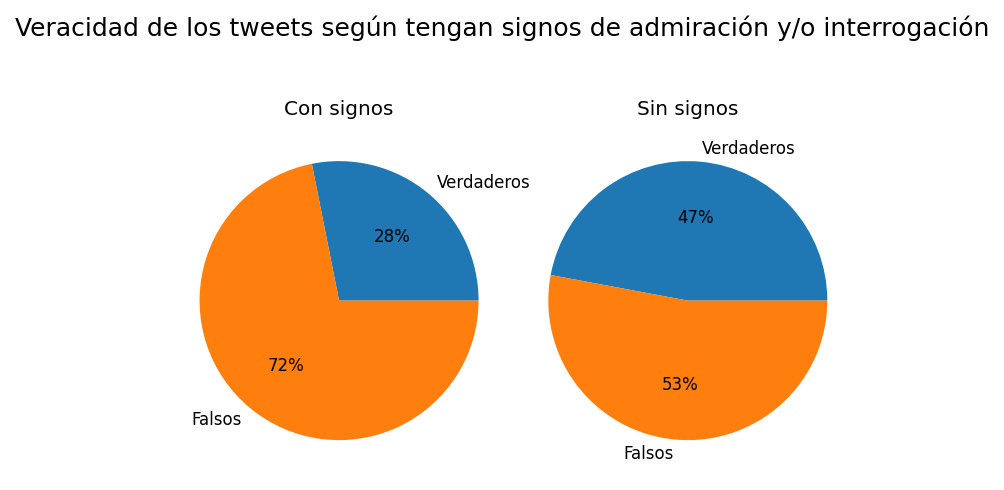

In [16]:
cantidad_de_tweets_con_signos_y_verdaderos = tweets[(tweets['tiene_signo_interr_o_admir'] == True) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_con_signos_y_falsos = tweets[(tweets['tiene_signo_interr_o_admir'] == True) & (tweets['target'] == 0)].shape[0]
cantidad_de_tweets_sin_signos_y_verdaderos = tweets[(tweets['tiene_signo_interr_o_admir'] == False) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_sin_signos_y_falsos = tweets[(tweets['tiene_signo_interr_o_admir'] == False) & (tweets['target'] == 0)].shape[0]

plt.rcParams['figure.dpi'] = 150

info1 = pd.Series([cantidad_de_tweets_con_signos_y_verdaderos, cantidad_de_tweets_con_signos_y_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
info2 = pd.Series([cantidad_de_tweets_sin_signos_y_verdaderos, cantidad_de_tweets_sin_signos_y_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
                  
mpl.rcParams['font.size'] = 10.0

fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('Veracidad de los tweets según tengan signos de admiración y/o interrogación')

mpl.rcParams['font.size'] = 8.0

ax1.set_title('Con signos')
ax2.set_title('Sin signos')

plt.subplots_adjust(wspace = 0)

info1.plot(kind='pie', ax = ax1, autopct='%1.0f%%')
info2.plot(kind='pie', ax = ax2, autopct='%1.0f%%')
